In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Machine learning algorithms
# Scaler
from sklearn.preprocessing import  StandardScaler
# Linera regression
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
# Polynomial regression
from sklearn.preprocessing import  PolynomialFeatures
# Decisin tree
from sklearn.tree import DecisionTreeRegressor
# Neural network
from sklearn.neural_network import  MLPClassifier
# data split
from sklearn.model_selection import train_test_split
# scores
from sklearn.metrics import accuracy_score ,f1_score, precision_score, recall_score, mean_squared_error, r2_score, mean_absolute_percentage_error

In [3]:
plt.style.use('seaborn-v0_8-darkgrid')
lr=LinearRegression()
logr=LogisticRegression()
ridge=Ridge(alpha=0.01)
dt=DecisionTreeRegressor(max_depth=20, min_samples_split=10, random_state=5)

In [4]:
def dtype_in_column(data_frame, col_id):
    x={'Initialize set'}
    for i in data_frame.iloc[:,col_id]:
        x.add(type(i))    
    x.remove('Initialize set')    
    for i in x:
        print(i)

In [5]:
# Import dataframes
wt=pd.read_excel('Research dataset.xlsx', sheet_name='wt')
rf=pd.read_excel('Research dataset.xlsx', sheet_name='rf')
tmp=pd.read_excel('Research dataset.xlsx', sheet_name='tmp')

In [6]:
# Water table dataset for each upazilla/station
abhaynagar_wt   = wt[wt.wid=='JES14']
abhaynagar_2_wt = wt[wt.wid=='JES12']
bagherpara_wt   = wt[wt.wid=='JE014']
chaugachha_wt   = wt[wt.wid=='JE009']
jessore_1_wt    = wt[wt.wid=='JE026']
jessore_2_wt    = wt[wt.wid=='JE018']
keshabpur_1_wt  = wt[wt.wid=='JE038']
keshabpur_2_wt  = wt[wt.wid=='JE057']
manirampur_wt   = wt[wt.wid=='JE010']
sharsha_1_wt    = wt[wt.wid=='JE055']
sharsha_2_wt    = wt[wt.wid=='JE013']

# Rainfall dataset for each upazilla
abhaynagar_rf = rf[rf.upazila=='Abhaynagar'].drop(columns=['upazila','rid'], axis=1)
sharsha_rf = rf[rf.upazila=='Sharsha'].drop(columns=['upazila','rid'], axis=1)
chaugachha_rf = rf[rf.upazila=='Chaugachha'].drop(columns=['upazila','rid'], axis=1)
jessore_rf = rf[rf.upazila=='Jessore Sadar'].drop(columns=['upazila','rid'], axis=1)
keshabpur_rf = rf[rf.upazila=='Keshabpur'].drop(columns=['upazila','rid'], axis=1)

In [7]:
# abhaynagar_wt.plot(title='Abhaynagar')
# abhaynagar_2_wt.plot(title='Abhaynagar 2')
# bagherpara_wt.plot(title='Bagherpara')
# chaugachha_wt.plot(title='Chaugachha')
# jessore_1_wt.plot(title='Jessore_1')
# jessore_2_wt.plot(title='Jessore_2')
# keshabpur_1_wt.plot(title='Keshabpur_1')
# keshabpur_2_wt.plot(title='Keshabpur_2')
# manirampur_wt.plot(title='Manirampur')
# sharsha_1_wt.plot(title='Sharsha_1')
# sharsha_2_wt.plot(title='Sharsha_2')


In [8]:
abhaynagar_2_wt
chaugachha_wt
jessore_1_wt
keshabpur_2_wt
sharsha_1_wt

,date,upazila,wid,wtable
14664,1990-01-01,Sharsha,JE055,3.56
14665,1990-01-10,Sharsha,JE055,2.40
14666,1990-01-15,Sharsha,JE055,3.75
14667,1990-01-22,Sharsha,JE055,3.80
14668,1990-01-29,Sharsha,JE055,3.85
...,...,...,...,...
16334,2024-01-01,Sharsha,JE055,4.52
16335,2024-01-15,Sharsha,JE055,4.80
16336,2024-01-22,Sharsha,JE055,5.00
16337,2024-01-29,Sharsha,JE055,5.20


In [9]:
# Merge water table and rainfall dataframes for jessore --> remove upazilla and wid columns --> drop na values --> save to new dataframe 
jes = keshabpur_2_wt.merge(keshabpur_rf, on='date', how='left').drop(columns=['upazila','wid'], axis=1).dropna().merge(tmp, on='date', how='left')

In [10]:
def plotit(n,y=(1998,2020),m=(5,10)):
    instr = ''' Invalid input.
Valids:
1 = Abhaynagar
2 = Chaugachha
3 = Jessore
4 = Keshabpur
5 = Sharsha
'''
    if n==1:
        data = abhaynagar_2_wt.merge(abhaynagar_rf, on='date', how='left').drop(columns=['upazila','wid'], axis=1).dropna().merge(tmp, on='date', how='left')
        title = 'Abhaynagar'
    elif n==2:
        data = chaugachha_wt.merge(chaugachha_rf, on='date', how='left').drop(columns=['upazila','wid'], axis=1).dropna().merge(tmp, on='date', how='left')
        title = 'Chaugachha'
    elif n==3:
        data = jessore_1_wt.merge(jessore_rf, on='date', how='left').drop(columns=['upazila','wid'], axis=1).dropna().merge(tmp, on='date', how='left')
        title = 'Jashore'
    elif n==4:
        data = keshabpur_2_wt.merge(keshabpur_rf, on='date', how='left').drop(columns=['upazila','wid'], axis=1).dropna().merge(tmp, on='date', how='left')
        title = 'Keshabpur'
    elif n==5:
        data = sharsha_1_wt.merge(sharsha_rf, on='date', how='left').drop(columns=['upazila','wid'], axis=1).dropna().merge(tmp, on='date', how='left')
        title = "Sharsha"
    else:
        print(instr)

    data=data.iloc[:,[0,3,2,1]]
    data['target']=data.shift(-1)['wtable']
    data.dropna(inplace=True)


    data['year'] = data['date'].dt.year

    # 2. Extract Month and Encode Cyclically
    data['month'] = data['date'].dt.month
    data['sin_month'] = np.sin(2 * np.pi * data['month'] / 12)
    data['cos_month'] = np.cos(2 * np.pi * data['month'] / 12)

    # 3. Extract Day of Month and Encode Cyclically
    data['day'] = data['date'].dt.day  # Extract day of the month (1-31)
    data['sin_day'] = np.sin(2 * np.pi * data['day'] / 31)  # Important: Divide by 31 (max days in a month)
    data['cos_day'] = np.cos(2 * np.pi * data['day'] / 31)

    # Drop the original 'month' and 'day' columns if you don't need them
    data = data.drop(columns=['month', 'day'])  # Optional

    month_filter = (data.date.dt.month>=m[0])&(data.date.dt.month<=m[1])
    up= y[1]
    train_filter = (data.date.dt.year<up)&(data.date.dt.year>y[0])&month_filter


    x_train= data[train_filter].drop(columns=['target'], axis=1).set_index('date')
    y_train= data[train_filter].target

    machine=dt.fit(x_train, y_train)

    R=pd.DataFrame(machine.predict(x_train))
    R.rename(columns={0:'y'}, inplace=True)
    R['x']=R.index
    R=R[['x','y']]
    R['D']=data[train_filter].date.values

    x=R['D']
    y=R['y']

    pf= PolynomialFeatures(degree=1)
    x_poly = pf.fit_transform(x.values.reshape(-1,1))
    ridge.fit(x_poly, y)

    plt.scatter(x,y, c='b', s=10)
    plt.plot(x,ridge.predict(x_poly), c='r')
    plt.ylabel('Water table depth (m)')
    plt.xlabel('Date')
    plt.title(title)
    plt.ylim(0,9)
    plt.gca().invert_yaxis()
    plt.show()
    

C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.0558e-40): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


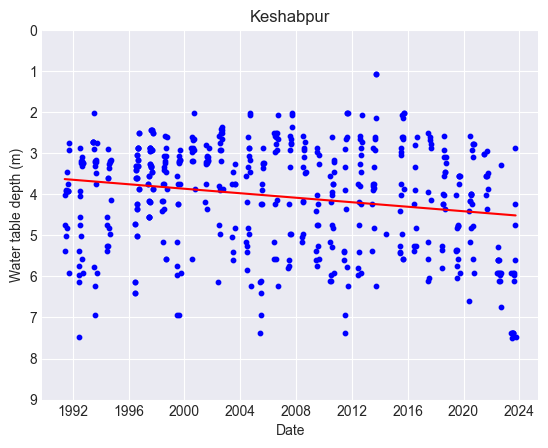

In [11]:
plotit(4,(1990,2025),(6,9))

In [12]:
jes=jes.iloc[:,[0,3,2,1]]
jes['target']=jes.shift(-1)['wtable']
jes.dropna(inplace=True)


jes['year'] = jes['date'].dt.year

# 2. Extract Month and Encode Cyclically
jes['month'] = jes['date'].dt.month
jes['sin_month'] = np.sin(2 * np.pi * jes['month'] / 12)
jes['cos_month'] = np.cos(2 * np.pi * jes['month'] / 12)

# 3. Extract Day of Month and Encode Cyclically
jes['day'] = jes['date'].dt.day  # Extract day of the month (1-31)
jes['sin_day'] = np.sin(2 * np.pi * jes['day'] / 31)  # Important: Divide by 31 (max days in a month)
jes['cos_day'] = np.cos(2 * np.pi * jes['day'] / 31)

# Drop the original 'month' and 'day' columns if you don't need them
jes = jes.drop(columns=['month', 'day'])  # Optional
jes

,date,temp,rfall,wtable,target,year,sin_month,cos_month,sin_day,cos_day
0,1990-01-01,15.1,0.0,4.37,2.90,1990,5.000000e-01,0.866025,0.201299,0.979530
1,1990-01-10,15.0,0.0,2.90,4.55,1990,5.000000e-01,0.866025,0.897805,-0.440394
2,1990-01-15,18.0,0.0,4.55,4.71,1990,5.000000e-01,0.866025,0.101168,-0.994869
3,1990-01-22,20.5,0.0,4.71,4.87,1990,5.000000e-01,0.866025,-0.968077,-0.250653
4,1990-01-29,23.4,0.0,4.87,5.28,1990,5.000000e-01,0.866025,-0.394356,0.918958
...,...,...,...,...,...,...,...,...,...,...
1641,2023-11-20,23.9,0.0,4.32,4.40,2023,-5.000000e-01,0.866025,-0.790776,-0.612106
1642,2023-11-27,22.6,0.0,4.40,7.50,2023,-5.000000e-01,0.866025,-0.724793,0.688967
1643,2023-12-06,22.2,0.0,7.50,4.56,2023,-2.449294e-16,1.000000,0.937752,0.347305
1644,2023-12-18,17.9,0.0,4.56,4.59,2023,-2.449294e-16,1.000000,-0.485302,-0.874347


(3.430673367556899,
 0.3020628974816725,
 -0.38002235013746044,
 0.7965060837176624)

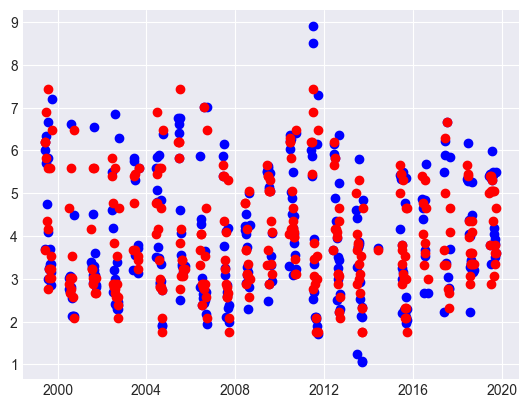

In [13]:
month_filter = (jes.date.dt.month>5)&(jes.date.dt.month<10)
up= 2020
train_filter = (jes.date.dt.year<up)&(jes.date.dt.year>1998)&month_filter
test_filter = (jes.date.dt.year>up)&month_filter

x_train= jes[train_filter].drop(columns=['target'], axis=1).set_index('date')
y_train= jes[train_filter].target

x_test= jes[test_filter].drop(columns=['target'], axis=1).set_index('date')
y_test= jes[test_filter].target

machine=dt.fit(x_train, y_train)
prediction = machine.predict(x_test)
#performace check
plt.scatter(x_train.index, y_train, c='b')
plt.scatter(x_train.index, machine.predict(x_train),c='r')

mean_squared_error(y_test, prediction), mean_absolute_percentage_error(y_test, prediction), r2_score(y_test, prediction), machine.score(x_train, y_train)

# plt.bar(['MSE','MAE%','R2 score','Score'],[mean_squared_error(y_test, prediction), mean_absolute_percentage_error(y_test, prediction), r2_score(y_test, prediction), machine.score(x_train, y_train)], color=['r','lime','purple','b'])

In [14]:
R=pd.DataFrame(machine.predict(x_train))

In [15]:
R.rename(columns={0:'y'}, inplace=True)
R['x']=R.index
R=R[['x','y']]

In [16]:
R['D']=jes[train_filter].date.values

In [17]:
R

,x,y,D
0,0,3.673333,1999-06-09
1,1,6.200000,1999-06-12
2,2,6.205556,1999-06-14
3,3,5.824000,1999-06-21
4,4,6.896667,1999-06-28
...,...,...,...
296,296,3.358889,2019-09-09
297,297,3.608333,2019-09-12
298,298,3.785000,2019-09-16
299,299,3.608333,2019-09-23


In [18]:
x=R['D']
y=R['y']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0, shuffle= False)

In [21]:
pf= PolynomialFeatures(degree=1)
x_poly = pf.fit_transform(x.values.reshape(-1,1))
ridge.fit(x_poly, y)

C:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=9.10725e-40): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=0.01)

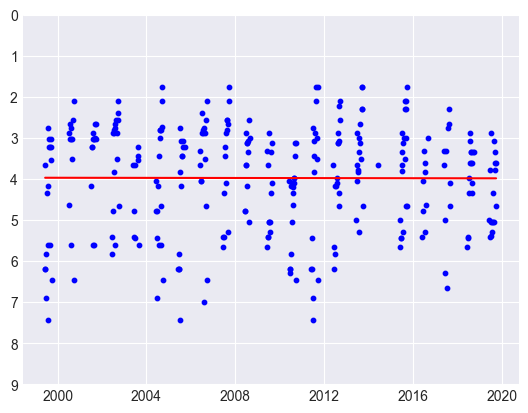

In [22]:
plt.scatter(x,y, c='b', s=10)
plt.plot(x,ridge.predict(x_poly), c='r')
plt.ylim(0,9)
plt.gca().invert_yaxis()